In [1]:
import pandas as pd


# Load the clean data
movies_eda = pd.read_csv('movies_eda.csv')

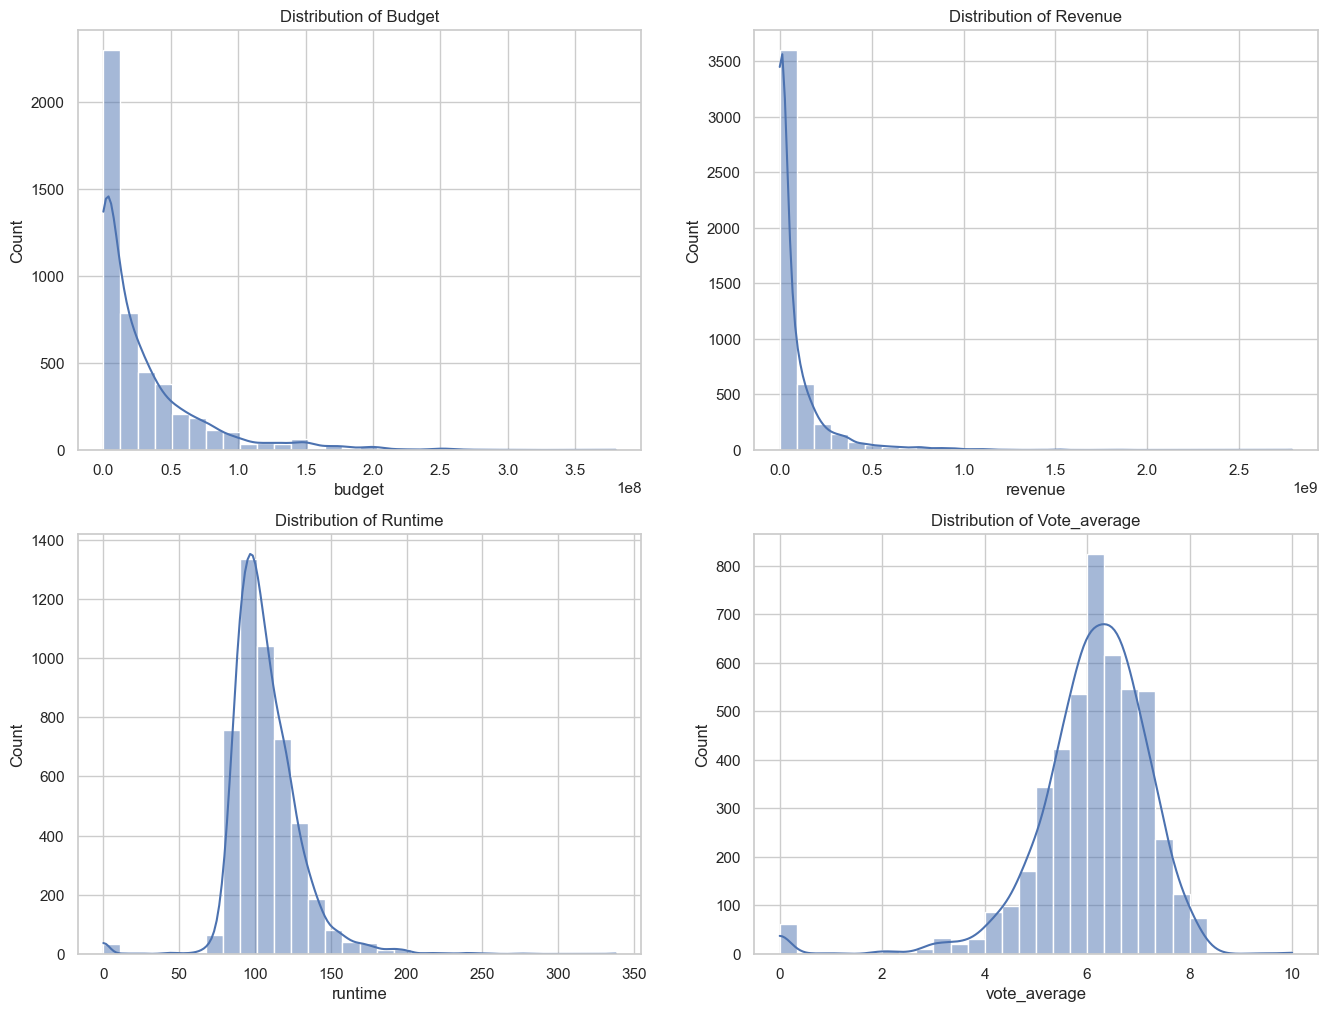

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting distributions of key variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

variables_to_plot = ['budget', 'revenue', 'runtime', 'vote_average']
for i, var in enumerate(variables_to_plot):
    sns.histplot(movies_eda[var], bins=30, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {var.capitalize()}')


Text(0.5, 1.0, 'Budget vs. Revenue by Profitability')

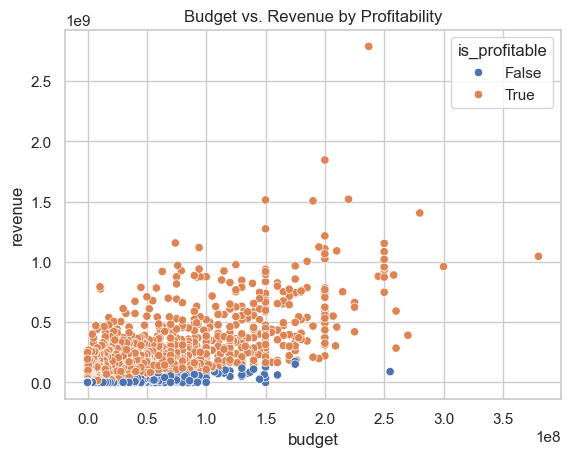

In [4]:
# Assuming 'profitable' is a boolean column indicating if a movie is profitable
sns.scatterplot(x='budget', y='revenue', hue='is_profitable', data=movies_eda)
plt.title('Budget vs. Revenue by Profitability')


Text(0.5, 1.0, 'Top 10 Genres in Profitable Movies')

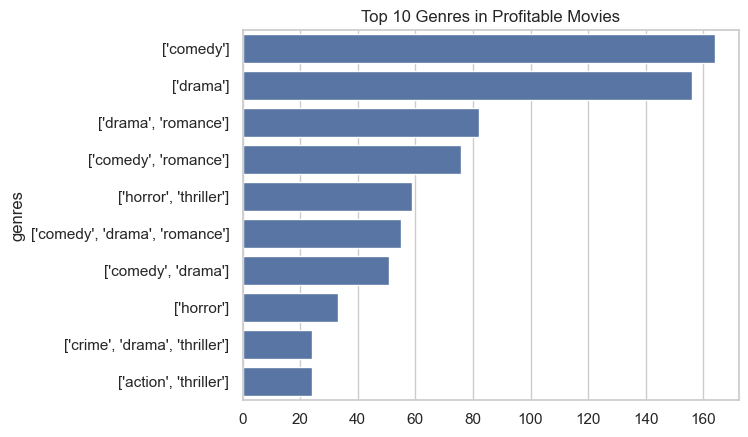

In [6]:
# Top genres in profitable movies
profitable_genres = movies_eda[movies_eda['is_profitable']].explode('genres')['genres'].value_counts().head(10)
sns.barplot(x=profitable_genres.values, y=profitable_genres.index)
plt.title('Top 10 Genres in Profitable Movies')


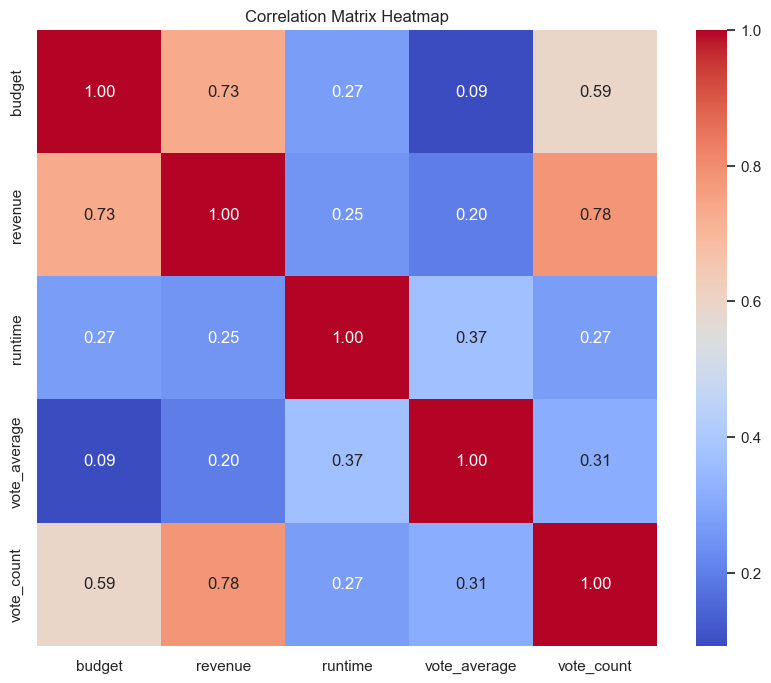

In [7]:
# Calculating the correlation matrix
corr = movies_eda[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']].corr()

# Generating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


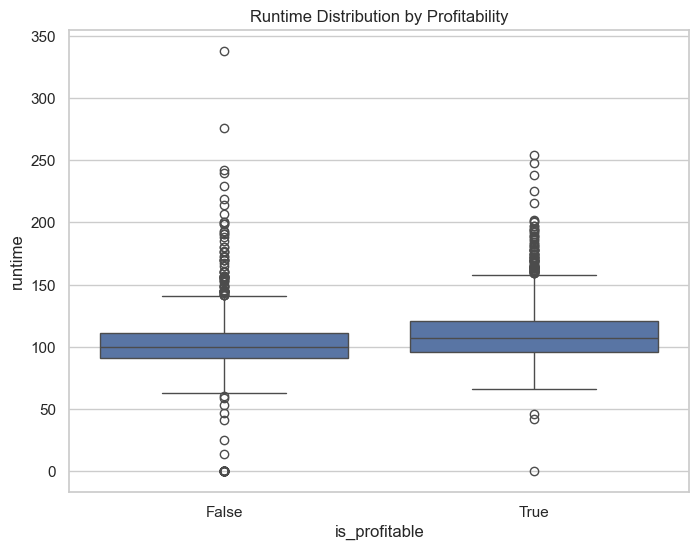

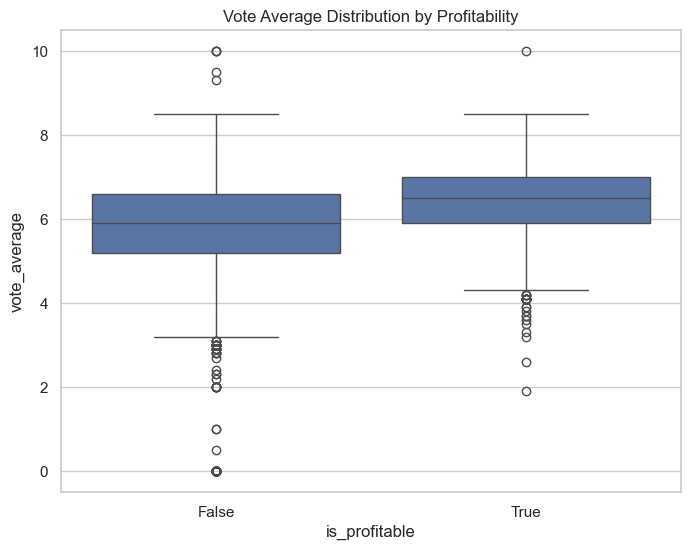

In [9]:
# Runtime comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_profitable', y='runtime', data=movies_eda)
plt.title('Runtime Distribution by Profitability')
plt.show()

# Vote average comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_profitable', y='vote_average', data=movies_eda)
plt.title('Vote Average Distribution by Profitability')
plt.show()
